In [ ]:
############### car_plates_py36

In [1]:
import os, sys
from numpy import mean
from math import sqrt
import pandas as pd
df1=pd.read_csv('LengthOfStay.csv')


df3=pd.read_csv('MetaData_Facilities.csv')
df13=pd.merge(df1,df3,left_on='facid', right_on='Id')
df13.head()
del df13['Id']
df13['los_numeric']=df13['lengthofstay'].astype('float')
del df13['lengthofstay']
df13.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,Capacity,Name,los_numeric
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,1.390722,30.432418,96,6.5,4,9/1/2012,B,80,Pulmonary 2 West,3.0
1,3,9/22/2012,1,F,0,0,0,0,0,0,...,1.065750,28.843812,64,6.5,2,9/25/2012,B,80,Pulmonary 2 West,3.0
2,6,11/27/2012,3,M,0,0,0,0,0,0,...,0.884663,27.875940,83,6.1,1,12/3/2012,B,80,Pulmonary 2 West,6.0
3,11,5/11/2012,0,F,0,0,0,0,0,0,...,1.254258,30.325155,73,6.5,1,5/12/2012,B,80,Pulmonary 2 West,1.0
4,17,12/10/2012,3,F,0,0,0,0,0,0,...,1.015645,32.052032,66,5.5,0,12/16/2012,B,80,Pulmonary 2 West,6.0


In [2]:
cols=df13.columns.tolist()


In [3]:
df13['vdate']=pd.to_datetime(df13['vdate'])
df13['daysofweek_admit']=df13['vdate'].dt.weekday_name
#print(df13.dtypes)
## encode string columns --> numerical 
from sklearn.preprocessing import LabelEncoder
le_rcount=LabelEncoder()
df13['rcount']=le_rcount.fit_transform(df13['rcount'])
le_gender=LabelEncoder()
df13['gender']=le_gender.fit_transform(df13['gender'])
le_facility=LabelEncoder()
df13['Name']=le_facility.fit_transform(df13['Name'])
le_daysofweekadmit=LabelEncoder()
df13['daysofweek_admit']=le_daysofweekadmit.fit_transform(df13['daysofweek_admit'])
print(df13.dtypes)
df13.head()

eid                                    int64
vdate                         datetime64[ns]
rcount                                 int32
gender                                 int32
dialysisrenalendstage                  int64
asthma                                 int64
irondef                                int64
pneum                                  int64
substancedependence                    int64
psychologicaldisordermajor             int64
depress                                int64
psychother                             int64
fibrosisandother                       int64
malnutrition                           int64
hemo                                   int64
hematocrit                           float64
neutrophils                          float64
sodium                               float64
glucose                              float64
bloodureanitro                       float64
creatinine                           float64
bmi                                  float64
pulse     

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,Capacity,Name,los_numeric,daysofweek_admit
0,1,2012-08-29,0,0,0,0,0,0,0,0,...,30.432418,96,6.5,4,9/1/2012,B,80,4,3.0,6
1,3,2012-09-22,1,0,0,0,0,0,0,0,...,28.843812,64,6.5,2,9/25/2012,B,80,4,3.0,2
2,6,2012-11-27,3,1,0,0,0,0,0,0,...,27.875940,83,6.1,1,12/3/2012,B,80,4,6.0,5
3,11,2012-05-11,0,0,0,0,0,0,0,0,...,30.325155,73,6.5,1,5/12/2012,B,80,4,1.0,0
4,17,2012-12-10,3,0,0,0,0,0,0,0,...,32.052032,66,5.5,0,12/16/2012,B,80,4,6.0,1


In [5]:
features=['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose',
 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'Capacity', 'Name']
df13[features].dtypes

rcount                          int32
gender                          int32
dialysisrenalendstage           int64
asthma                          int64
irondef                         int64
pneum                           int64
substancedependence             int64
psychologicaldisordermajor      int64
depress                         int64
psychother                      int64
fibrosisandother                int64
malnutrition                    int64
hemo                            int64
hematocrit                    float64
neutrophils                   float64
sodium                        float64
glucose                       float64
bloodureanitro                float64
creatinine                    float64
bmi                           float64
pulse                           int64
respiration                   float64
secondarydiagnosisnonicd9       int64
Capacity                        int64
Name                            int32
dtype: object

In [6]:
def GP_regression_std(regressor, X):
    _, std = regressor.predict(X, return_std=True)
    query_idx = np.argmax(std)
    return query_idx, X[query_idx]

In [7]:
X=df13[features].values
y=df13[cols[-1]].values
X=X.reshape(-1,len(features))
y=y.reshape(-1,1)
X.shape, y.shape

((100000, 25), (100000, 1))

In [8]:
del df13

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 25), (80000, 1), (20000, 25), (20000, 1))

In [10]:
del X, y

In [11]:
from modAL.models import ActiveLearner
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
import numpy as np
# sample from X_train to avoid OOM error 
n_initial = 5000
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
X_train, y_train = X_train[initial_idx], y_train[initial_idx]

kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
         + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))

regressor = ActiveLearner(
    estimator=GaussianProcessRegressor(kernel=kernel),
    query_strategy=GP_regression_std,
    X_training=X_train, y_training=y_train
)

# prediction X_test BEFORE active learning 

In [13]:
initial_idx = np.random.choice(range(len(X_test)), size=int(n_initial*0.2), replace=False)
X_test, y_test = X_test[initial_idx], y_test[initial_idx]
y_pred_test = regressor.predict(X_test)
y_residual_test = y_test - y_pred_test

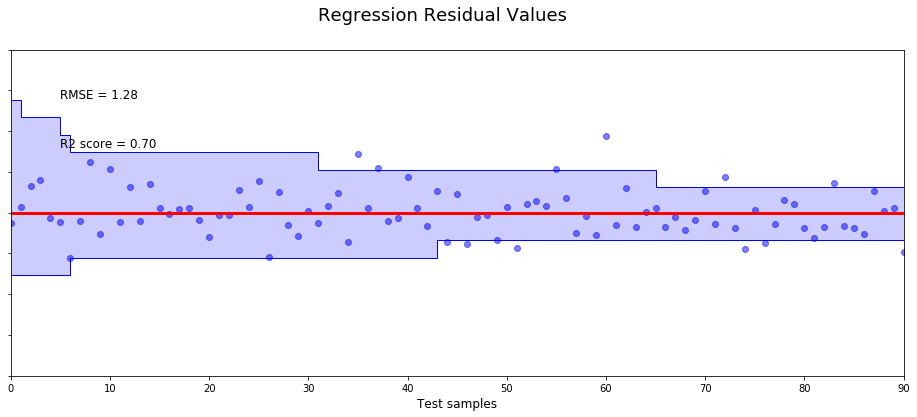

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

# set up a multi-plot chart
f, ax = plt.subplots(1, 1, gridspec_kw = {'width_ratios':[1], 'wspace':0, 'hspace': 0})
f.suptitle('Regression Residual Values', fontsize = 18)
f.set_figheight(6)
f.set_figwidth(16)

# plot residual values of test set
ax.axis([0, len(X_test), -10, 10])
ax.plot(y_residual_test, 'bo', alpha = 0.5)
ax.plot([-10,360],[0,0], 'r-', lw = 3)
ax.text(5,7,'RMSE = {0:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))), fontsize = 12)
ax.text(5,4,'R2 score = {0:.2f}'.format(r2_score(y_test, y_pred_test)), fontsize = 12)
ax.set_xlabel('Test samples', fontsize = 12)
ax.set_ylabel('Residual Values', fontsize = 12)
ax.set_yticklabels([])
# plot histogram
ax.hist(y_residual_test, orientation = 'horizontal', color = 'b', bins = 10, histtype = 'step');
ax.hist(y_residual_test, orientation = 'horizontal', color = 'b', alpha = 0.2, bins = 10);

plt.show()

# Active Learning 100 samples from X_test

In [21]:
# active learning
n_queries = 100
for idx in range(n_queries):
    query_idx, query_instance = regressor.query(X_test)
    regressor.teach(X_test[query_idx].reshape(1, -1), y_test[query_idx].reshape(1,-1))

# prediction X_test AFTER active learning 

In [22]:
y_pred_test = regressor.predict(X_test)
y_residual_test = y_test - y_pred_test

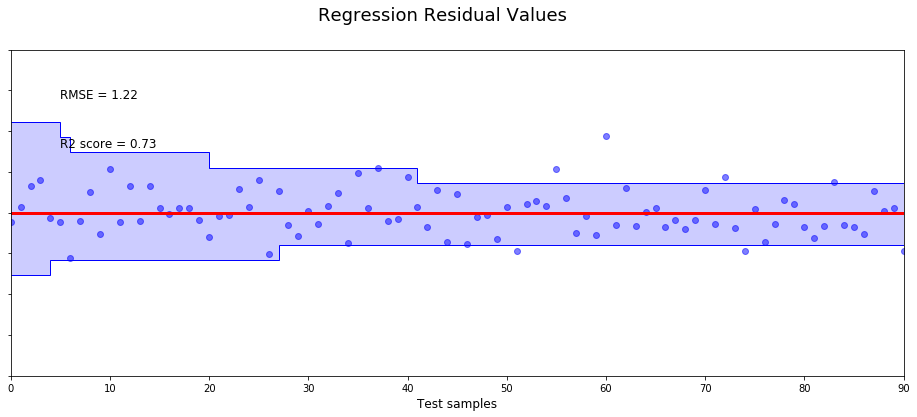

In [23]:
# set up a multi-plot chart
f, ax = plt.subplots(1, 1, gridspec_kw = {'width_ratios':[1], 'wspace':0, 'hspace': 0})
f.suptitle('Regression Residual Values', fontsize = 18)
f.set_figheight(6)
f.set_figwidth(16)

# plot residual values of test set
ax.axis([0, 90, -10, 10])
ax.plot(y_residual_test, 'bo', alpha = 0.5)
ax.plot([-10,360],[0,0], 'r-', lw = 3)
ax.text(5,7,'RMSE = {0:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))), fontsize = 12)
ax.text(5,4,'R2 score = {0:.2f}'.format(r2_score(y_test, y_pred_test)), fontsize = 12)
ax.set_xlabel('Test samples', fontsize = 12)
ax.set_yticklabels([])
# plot histogram
ax.hist(y_residual_test, orientation = 'horizontal', color = 'b', bins = 10, histtype = 'step');
ax.hist(y_residual_test, orientation = 'horizontal', color = 'b', alpha = 0.2, bins = 10);

plt.show()